# Real Example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 8601.0742 - mae: 8601.0742
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7879.3047 - mae: 7879.3047
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7482.9775 - mae: 7482.9775
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7580.6802 - mae: 7580.6802
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7745.9458 - mae: 7745.9458
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7688.1313 - mae: 7688.1313
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7550.4717 - mae: 7550.4717
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7772.6460 - mae: 7772.6460
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7586.7505 - mae: 7586.7505
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7688.0840 - mae: 7688.0840

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8365.5283 - mae: 8365.5283


[8365.5283203125, 8365.5283203125]

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4696.9663 - mae: 4696.9663


[4696.96630859375, 4696.96630859375]

[]

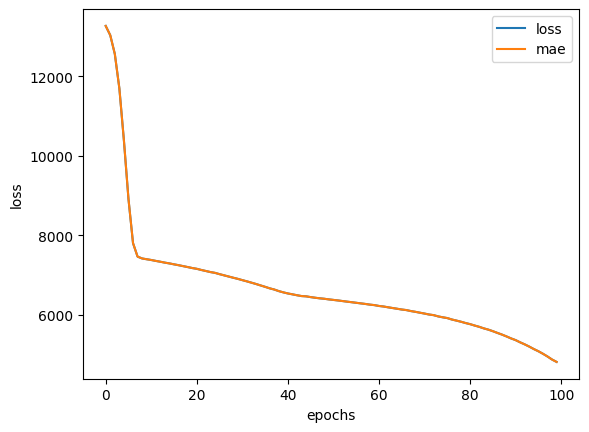

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot()

In [ ]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3488.3979 - mae: 3488.3979


(3488.39794921875, 3488.39794921875)

[]

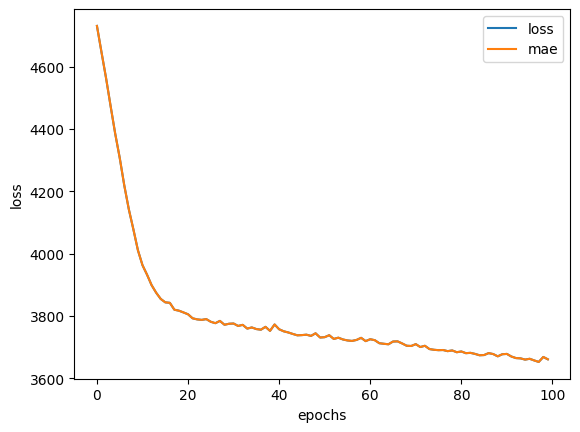

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot()

# Preprocessing data (normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3167.3601 - mae: 3167.3601


In [ ]:
insurance_model_2_mae, insurance_model_3_mae

(3488.39794921875, 3167.360107421875)

# Classification

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

#train_data[0]

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
test_data.shape

(10000, 28, 28)

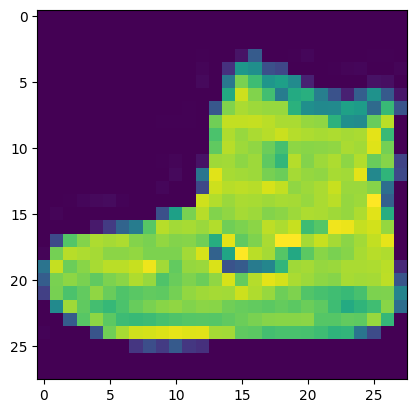

9

In [ ]:
plt.figure()
plt.imshow(train_data[0])
plt.show()
train_labels[0]

# Preprocess the data

In [ ]:
train_data = train_data/ 255.0

test_data = test_data/ 255.0
#train_data[0]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1332 - accuracy: 0.6323
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6611 - accuracy: 0.7631
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5801 - accuracy: 0.7911
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5349 - accuracy: 0.8087
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5050 - accuracy: 0.8217
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4846 - accuracy: 0.8291
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4695 - accuracy: 0.8339
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4573 - accuracy: 0.8386
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4470 - accuracy: 0.8419
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4

In [ ]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4661 - accuracy: 0.8331 - 578ms/epoch - 2ms/step

Test accuracy: 0.8331000208854675


In [ ]:
model.predict(test_data)[0]

313/313 [==============================] - 1s 2ms/step


array([ -8.709843  , -11.778179  ,  -7.1516895 ,  -7.1215878 ,
        -5.9449377 ,   3.3219893 ,  -5.472227  ,   3.8553066 ,
        -0.08018993,   4.683842  ], dtype=float32)

In [ ]:
test_labels[0]

9

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data = train_data/ 255.0

test_data = test_data/ 255.0

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4197 - accuracy: 0.4713 - val_loss: 1.0003 - val_accuracy: 0.6669
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9017 - accuracy: 0.6956 - val_loss: 0.8612 - val_accuracy: 0.7209
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8066 - accuracy: 0.7246 - val_loss: 0.8065 - val_accuracy: 0.7050
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7663 - accuracy: 0.7334 - val_loss: 0.7771 - val_accuracy: 0.7264
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7459 - accuracy: 0.7382 - val_loss: 0.7624 - val_accuracy: 0.7423
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7321 - accuracy: 0.7407 - val_loss: 0.7649 - val_accuracy: 0.7391
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7233 - accuracy: 0.7437 - val_loss: 0.7880 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

NameError: ignored

In [ ]:
test_loss, test_acc = model_2.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7386 - accuracy: 0.7406 - 730ms/epoch - 2ms/step

Test accuracy: 0.7405999898910522


In [ ]:
model_2.predict(test_data)[0]

313/313 [==============================] - 1s 2ms/step


array([6.5779164e-13, 5.6798282e-09, 4.0202924e-10, 8.4890844e-11,
       2.9920776e-07, 1.2748440e-01, 7.3693174e-10, 5.0412917e-01,
       6.2633108e-04, 3.6775979e-01], dtype=float32)

In [ ]:
test_labels[0]

9